In [4]:
#Import Packages

import sys
sys.path.append('stylegan2master/')
from stylegan2master import pretrained_networks
from stylegan2master import dnnlib
from stylegan2master.dnnlib import tflib

import subprocess
from subprocess import PIPE

import random
from pathlib import Path
from time import strftime
from PIL import Image
import pickle
import numpy as np
import ipywidgets as widgets
from tqdm import tqdm

from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial import distance_matrix
import matplotlib.pyplot as mpplt
import matplotlib

In [2]:
#Define Environment for Virtual Hardness Evaluator

Evaluator_Env = {'ALLUSERSPROFILE': 'C:\\ProgramData',
        'APPDATA': 'C:\\Users\\illew\\AppData\\Roaming',
        'COMMONPROGRAMFILES': 'C:\\Program Files\\Common Files',
        'COMMONPROGRAMFILES(X86)': 'C:\\Program Files (x86)\\Common Files',
        'COMMONPROGRAMW6432': 'C:\\Program Files\\Common Files',
        'COMPUTERNAME': 'LAPTOP-F986GFUC',
        'COMSPEC': 'C:\\WINDOWS\\system32\\cmd.exe',
        'CUDA_PATH': 'C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v10.0',
        'CUDA_PATH_V10_0': 'C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v10.0',
        'CUDA_PATH_V11_4': 'C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v11.4',
        'DRIVERDATA': 'C:\\Windows\\System32\\Drivers\\DriverData',
        'FPS_BROWSER_APP_PROFILE_STRING': 'Internet Explorer',
        'FPS_BROWSER_USER_PROFILE_STRING': 'Default',
        'HOMEDRIVE': 'C:',
        'HOMEPATH': '\\Users\\illew',
        'LOCALAPPDATA': 'C:\\Users\\illew\\AppData\\Local',
        'LOGONSERVER': '\\\\LAPTOP-F986GFUC',
        'NUMBER_OF_PROCESSORS': '12',
        'NVCUDASAMPLES10_0_ROOT': 'C:\\ProgramData\\NVIDIA Corporation\\CUDA Samples\\v10.0',
        'NVCUDASAMPLES11_4_ROOT': 'C:\\ProgramData\\NVIDIA Corporation\\CUDA Samples\\v11.4',
        'NVCUDASAMPLES_ROOT': 'C:\\ProgramData\\NVIDIA Corporation\\CUDA Samples\\v10.0',
        'NVTOOLSEXT_PATH': 'C:\\Program Files\\NVIDIA Corporation\\NvToolsExt\\',
        'ONEDRIVE': 'C:\\Users\\illew\\OneDrive',
        'ONEDRIVECONSUMER': 'C:\\Users\\illew\\OneDrive',
        'OS': 'Windows_NT',
        'PATH': 'C:\\Users\\illew\\anaconda3\\envs\\tf-gpu-hardness;C:\\Users\\illew\\anaconda3\\envs\\tf-gpu-hardness\\Library\\mingw-w64\\bin;C:\\Users\\illew\\anaconda3\\envs\\tf-gpu-hardness\\Library\\usr\\bin;C:\\Users\\illew\\anaconda3\\envs\\tf-gpu-hardness\\Library\\bin;C:\\Users\\illew\\anaconda3\\envs\\tf-gpu-hardness\\Scripts;C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v10.0\\bin;C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v10.0\\libnvvp;C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v11.4\\bin;C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v11.4\\libnvvp;C:\\Windows\\system32;C:\\Windows;C:\\Windows\\System32\\Wbem;C:\\Windows\\System32\\WindowsPowerShell\\v1.0\\;C:\\Windows\\System32\\OpenSSH\\;C:\\Program Files (x86)\\Microsoft Visual Studio\\2019\\Community\\VC\\Auxiliary\\Build\\vcvars64.bat;C:\\Program Files (x86)\\Microsoft Visual Studio\\2017\\Community\\VC\\Tools\\MSVC\\14.16.27023\\bin\\Hostx64\\x64;C:\\Program Files (x86)\\NVIDIA Corporation\\PhysX\\Common;C:\\Program Files\\NVIDIA Corporation\\NVIDIA NvDLISR;C:\\Program Files\\PuTTY\\;C:\\WINDOWS\\system32;C:\\WINDOWS;C:\\WINDOWS\\System32\\Wbem;C:\\WINDOWS\\System32\\WindowsPowerShell\\v1.0\\;C:\\WINDOWS\\System32\\OpenSSH\\;C:\\Users\\illew\\AppData\\Local\\Microsoft\\WindowsApps;;C:\\Users\\illew\\anaconda3\\envs\\tf-gpu-hardness\\lib\\site-packages\\scipy\\.libs',
        'PATHEXT': '.COM;.EXE;.BAT;.CMD;.VBS;.VBE;.JS;.JSE;.WSF;.WSH;.MSC',
        'PROCESSOR_ARCHITECTURE': 'AMD64',
        'PROCESSOR_IDENTIFIER': 'Intel64 Family 6 Model 165 Stepping 2, GenuineIntel',
        'PROCESSOR_LEVEL': '6',
        'PROCESSOR_REVISION': 'a502',
        'PROGRAMDATA': 'C:\\ProgramData',
        'PROGRAMFILES': 'C:\\Program Files',
        'PROGRAMFILES(X86)': 'C:\\Program Files (x86)',
        'PROGRAMW6432': 'C:\\Program Files',
        'PSMODULEPATH': 'C:\\Program Files\\WindowsPowerShell\\Modules;C:\\WINDOWS\\system32\\WindowsPowerShell\\v1.0\\Modules',
        'PUBLIC': 'C:\\Users\\Public',
        'SESSIONNAME': 'Console',
        'SYSTEMDRIVE': 'C:',
        'SYSTEMROOT': 'C:\\WINDOWS',
        'TEMP': 'C:\\Users\\illew\\AppData\\Local\\Temp',
        'TMP': 'C:\\Users\\illew\\AppData\\Local\\Temp',
        'USERDOMAIN': 'LAPTOP-F986GFUC',
        'USERDOMAIN_ROAMINGPROFILE': 'LAPTOP-F986GFUC',
        'USERNAME': 'illew',
        'USERPROFILE': 'C:\\Users\\illew',
        'WINDIR': 'C:\\WINDOWS',
        '__PSLOCKDOWNPOLICY': '0',
        'CONDA_PREFIX': 'C:\\Users\\illew\\anaconda3\\envs\\tf-gpu-hardness',
        'PYDEVD_USE_FRAME_EVAL': 'NO',
        'JPY_INTERRUPT_EVENT': '2500',
        'IPY_INTERRUPT_EVENT': '2500',
        'JPY_PARENT_PID': '2552',
        'TERM': 'xterm-color',
        'CLICOLOR': '1',
        'PAGER': 'cat',
        'GIT_PAGER': 'cat',
        'MPLBACKEND': 'module://matplotlib_inline.backend_inline',
        'TF2_BEHAVIOR': '1'}

In [3]:
#Define evaluator model function
def Hardness_Evaluator() -> list:
    result = subprocess.run(
        [
            'C:\\Users\\illew\\anaconda3\\envs\\tf-gpu-hardness\\python.exe', 'Hardness/Hardness_Evaluator.py'
        ], 
        env=Evaluator_Env,
        stdout=PIPE, stderr=PIPE
    )
    Hardness_List = [float(r) for r in result.stdout.decode("utf-8").strip().split("\r\n")]
    return Hardness_List

In [4]:
#Define StyleGAN support functions

# Load the StyleGAN2 Model
def load_model(model_path):
    _G, _D, Gs = pretrained_networks.load_networks(model_path)
    
    noise_vars = [var for name, var in Gs.components.synthesis.vars.items() if name.startswith('noise')]
    
    Gs_kwargs = dnnlib.EasyDict()
    Gs_kwargs.output_transform = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
    Gs_kwargs.randomize_noise = False
    
    return Gs, noise_vars, Gs_kwargs

# Generate images given a random seed (Integer)
def generate_image_random(rand_seed):
    rnd = np.random.RandomState(rand_seed)
    z = rnd.randn(1, *Gs.input_shape[1:])
    tflib.set_vars({var: rnd.randn(*var.shape.as_list()) for var in noise_vars})
    images = Gs.run(z, None, **Gs_kwargs)
    return images, z

# Generate images given a latent code ( vector of size [1, 512] )
def generate_image_from_z(z):
    images = Gs.run(z, None, **Gs_kwargs)
    return images

# Interpolate an image between two others
def linear_interpolate(code1, code2, alpha):
    return code1 * alpha + code2 * (1 - alpha)

In [6]:
#Load Generative Model
model_path = './stylegan2master/results/00080-hardness/network-snapshot-002258.pkl'
Gs, noise_vars, Gs_kwargs = load_model(model_path)

Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.


In [37]:
################ Initialization ######################

#Generate Initial Population
Population_Size = 10

image_size = 200
stamp = strftime('%m_%d_%H_%M')
Sample_Image_Folder = Path('Hardness/HardnessGA_'+stamp)
if not Sample_Image_Folder.exists():
    Sample_Image_Folder.mkdir()

Population=[] #A list of arrays
for i in range(Population_Size):
    Sample_Code = np.random.default_rng().uniform(-10,10,(1,512))
    Population.append(Sample_Code)
    Temp_Image = generate_image_from_z(Sample_Code)
    Sample_Image = Image.fromarray(Temp_Image[0]).resize((image_size, image_size))
    Sample_Image.save(str(Sample_Image_Folder)+'/'+str(i)+'.png')

In [38]:
%%time
################ GENETIC ALGORITHM START ######################

Target_Hardness = 6.0

Save = False
if Save:
    stamp = '04_04_16_22'
    Sample_Image_Folder = Path('Hardness/HardnessGA_'+stamp)

#Choose how many generations to run
generations=1000 #1000 gen ~ 3.5 hours
bestfit=[]
worstfit=[]
avgfit=[]
avghardness=[]
devhardness=[]
Bes_Index=0
convergence=10
for gen in range(generations):
    ###Selection (input Population_Size, Population; output Parent1, Parent2)
    sel=random.sample(range(0, Population_Size), 2) #Random selection
    Parent1=Population[sel[0]]
    Parent2=Population[sel[1]]     

    ###Crossover (input Parent1, Parent2; output Child1, Child2)
    Child1=linear_interpolate(Parent1, Parent2, random.gauss(0.5, 0.2))
    Child2=linear_interpolate(Parent1, Parent2, random.gauss(1.5, 0.2))

    ###Mutation (input Child1; output MChild)
    MChild=Child1
    PointRate = 1/convergence #percentage chance of mutation
    PointMag = random.gauss(2, 1)/convergence #stddev of mutation
    for i in range(len(Child1)):
        if random.random()<PointRate:
            replaced=Child1[i]
            mutation=random.gauss(replaced, PointMag)
            MChild[i]=mutation
   
    ###Specialization (input Parent1; output MChild2)
    MChild2=Parent1*random.gauss(1.5, 0.2)
    
    ###Migration (input N/A, output RChild)
    RChild = np.random.default_rng().uniform(-5,5,(1,512))
    
    ###Competition (input Population, Child1, Child2, MChild, MChild2, RChild, output new Population)
    Addition_Count = 0
    for j in (Child1,Child2,MChild,MChild2,RChild):
        Population.append(j)
        Temp_Image = generate_image_from_z(j)
        Sample_Image = Image.fromarray(Temp_Image[0]).resize((image_size, image_size))
        Sample_Image.save(str(Sample_Image_Folder)+'/'+str(Population_Size+Addition_Count)+'.png')
        Addition_Count+=1
    Fitness = [-1*abs(x - Target_Hardness) for x in Hardness_Evaluator()]
    Hardness = Hardness_Evaluator()
    print(Fitness)
    
    Rando_Death=2
    for k in range(Rando_Death):
        Safe_Index=np.argmax(Fitness)
        Att_Index=random.choice([i for i in range(len(Fitness)) if i not in [Safe_Index]])
        print("Structure "+str(Att_Index)+" dies randomly with "+str(Fitness[Att_Index])+" fitness")
        Population.pop(Att_Index)
        Fitness.pop(Att_Index)
        Hardness.pop(Att_Index)
    
    Attrition=3
    for k in range(Attrition):
        Att_Index=np.argmin(Fitness)
        print("Structure "+str(Att_Index)+" dies with only "+str(Fitness[Att_Index])+" fitness")
        Population.pop(Att_Index)
        Fitness.pop(Att_Index)  
        Hardness.pop(Att_Index)            

    for i in range(Population_Size):
        Sample_Code = Population[i]
        Temp_Image = generate_image_from_z(Sample_Code)
        Sample_Image = Image.fromarray(Temp_Image[0]).resize((image_size, image_size))
        Sample_Image.save(str(Sample_Image_Folder)+'/'+str(i)+'.png')
    
    print(Fitness)
    
    Bes_Index=np.argmax(Fitness)
    bestfit.append(Fitness[Bes_Index])
    worstfit.append(min(Fitness))
    avgfit.append(sum(Fitness) / len(Fitness))
    
    avghardness.append(sum(Hardness)/len(Hardness))
    devhardness.append((sum([((x - avghardness[-1]) ** 2) for x in Hardness])/len(Hardness)) ** 0.5)
    
    print("Generation "+str(gen)+" completed. Best fitness: "+str(max(Fitness))+" at index "+str(Bes_Index)+"\n")
    print("Average hardness "+str(avghardness[-1])+" with standard deviation "+str(devhardness[-1])+"\n")
    
    convergence = abs(max(Fitness)-min(Fitness))
    if convergence < 0.01 and gen > generations/4:
        print("Structure Saturation")
        break

#Print fitness traces to CSV
totalfit = np.transpose(np.array([bestfit, worstfit, avgfit, avghardness, devhardness]))
np.savetxt(str(Sample_Image_Folder)+'/Fitness_Traces.csv', totalfit, delimiter=',')

[-1.6954545974731445, -0.6320247650146484, -0.4559164047241211, -1.4588866233825684, -3.0084240436553955, -2.6439034938812256, -2.791106939315796, -2.8248679637908936, -2.671717882156372, -1.6639595031738281, -2.2049105167388916, -1.6061315536499023, -2.205204486846924, -1.6957740783691406, -2.380729913711548]
Structure 9 dies randomly with -1.6639595031738281 fitness
Structure 11 dies randomly with -2.205204486846924 fitness
Structure 4 dies with only -3.0084240436553955 fitness
Structure 6 dies with only -2.8248679637908936 fitness
Structure 5 dies with only -2.791106939315796 fitness
[-1.6954545974731445, -0.6320247650146484, -0.4559164047241211, -1.4588866233825684, -2.6439034938812256, -2.671717882156372, -2.2049105167388916, -1.6061315536499023, -1.6957740783691406, -2.380729913711548]
Generation 0 completed. Best fitness: -0.4559164047241211 at index 2

Average hardness 4.255455017089844 with standard deviation 0.7272534151073222

[-1.695404052734375, -0.6320328712463379, -0.455

[-0.5007743835449219, -0.3136296272277832, -0.455930233001709, -0.45587825775146484, -0.544680118560791, -0.4463920593261719, -0.45587587356567383, -0.8351702690124512, -0.8351621627807617, -0.5007128715515137]
Generation 8 completed. Best fitness: -0.3136296272277832 at index 1

Average hardness 5.465579414367676 with standard deviation 0.16070655757430402

[-0.5007743835449219, -0.31360960006713867, -0.4559359550476074, -0.4559507369995117, -0.5445489883422852, -0.4462614059448242, -0.45587587356567383, -0.8351650238037109, -0.8351635932922363, -0.5007662773132324, -0.4221343994140625, -0.8234939575195312, -0.4222593307495117, -0.8351688385009766, -2.580958604812622]
Structure 3 dies randomly with -0.4559507369995117 fitness
Structure 13 dies randomly with -2.580958604812622 fitness
Structure 12 dies with only -0.8351688385009766 fitness
Structure 6 dies with only -0.8351650238037109 fitness
Structure 6 dies with only -0.8351635932922363 fitness
[-0.5007743835449219, -0.3136096000671

[-0.44626331329345703, -0.4222593307495117, -0.3136119842529297, -0.444486141204834, -0.3136105537414551, -0.5446014404296875, -0.5447335243225098, -0.3108491897583008, -0.45113086700439453, -0.4511570930480957]
Generation 17 completed. Best fitness: -0.3108491897583008 at index 7

Average hardness 5.575729656219482 with standard deviation 0.0828776018430729

[-0.4464282989501953, -0.4221343994140625, -0.3136119842529297, -0.44440317153930664, -0.31360578536987305, -0.5446090698242188, -0.5447349548339844, -0.31084394454956055, -0.45114803314208984, -0.4511451721191406, -0.6247453689575195, -0.46637678146362305, -0.6250085830688477, -0.5446290969848633, -0.28840112686157227]
Structure 8 dies randomly with -0.45114803314208984 fitness
Structure 12 dies randomly with -0.5446290969848633 fitness
Structure 11 dies with only -0.6250085830688477 fitness
Structure 9 dies with only -0.6247453689575195 fitness
Structure 6 dies with only -0.5447349548339844 fitness
[-0.4464282989501953, -0.42213

[-0.3136482238769531, -0.5446672439575195, -0.3136172294616699, -0.28839778900146484, -0.3135185241699219, -0.5312919616699219, -0.5313558578491211, -0.4663114547729492, -0.20612525939941406, -0.2883796691894531]
Generation 26 completed. Best fitness: -0.20612525939941406 at index 8

Average hardness 5.620268678665161 with standard deviation 0.1185785783734404

[-0.3136105537414551, -0.5446224212646484, -0.31360578536987305, -0.28839874267578125, -0.3134946823120117, -0.5312938690185547, -0.5313596725463867, -0.4679126739501953, -0.20612525939941406, -0.2883777618408203, -0.6682906150817871, -1.1353740692138672, -0.6682305335998535, -0.5446977615356445, -2.1313908100128174]
Structure 14 dies randomly with -2.1313908100128174 fitness
Structure 4 dies randomly with -0.3134946823120117 fitness
Structure 10 dies with only -1.1353740692138672 fitness
Structure 9 dies with only -0.6682906150817871 fitness
Structure 9 dies with only -0.6682305335998535 fitness
[-0.3136105537414551, -0.5446224

[-0.31360912322998047, -0.20612525939941406, -0.28838348388671875, -0.2883920669555664, -0.2884330749511719, -0.20621109008789062, -0.28838491439819336, -0.2883768081665039, -0.2883877754211426, -0.2884182929992676]
Generation 35 completed. Best fitness: -0.20612525939941406 at index 1

Average hardness 5.725527811050415 with standard deviation 0.034956849429084

[-0.31360435485839844, -0.2061176300048828, -0.28838348388671875, -0.2883920669555664, -0.2884330749511719, -0.2061610221862793, -0.28842782974243164, -0.28839588165283203, -0.28838062286376953, -0.2884182929992676, -0.5863127708435059, -2.0321760177612305, -0.5863370895385742, -0.31358766555786133, -1.9302868843078613]
Structure 9 dies randomly with -0.2884182929992676 fitness
Structure 3 dies randomly with -0.2883920669555664 fitness
Structure 9 dies with only -2.0321760177612305 fitness
Structure 11 dies with only -1.9302868843078613 fitness
Structure 9 dies with only -0.5863370895385742 fitness
[-0.31360435485839844, -0.20

[-0.20610284805297852, -0.20612621307373047, -0.2061767578125, -0.2061014175415039, -0.20616865158081055, -0.20612573623657227, -0.20618343353271484, -0.20612239837646484, -0.202728271484375, -0.20606565475463867]
Generation 44 completed. Best fitness: -0.202728271484375 at index 8

Average hardness 5.7942098617553714 with standard deviation 0.0010212255846508763

[-0.2061004638671875, -0.20611143112182617, -0.20610809326171875, -0.2060999870300293, -0.20612573623657227, -0.2061161994934082, -0.20618343353271484, -0.20612430572509766, -0.202728271484375, -0.20607614517211914, -2.4509217739105225, -0.20057964324951172, -2.450866937637329, -0.20274591445922852, -3.0127766132354736]
Structure 9 dies randomly with -0.20607614517211914 fitness
Structure 7 dies randomly with -0.20612430572509766 fitness
Structure 12 dies with only -3.0127766132354736 fitness
Structure 8 dies with only -2.4509217739105225 fitness
Structure 9 dies with only -2.450866937637329 fitness
[-0.2061004638671875, -0.2

[-0.20612668991088867, -0.2061176300048828, -0.2061309814453125, -0.2027568817138672, -0.20061683654785156, -0.20275354385375977, -0.20039939880371094, -0.2006816864013672, -0.20261096954345703, -0.20275211334228516]
Generation 53 completed. Best fitness: -0.20039939880371094 at index 6

Average hardness 5.7969053268432615 with standard deviation 0.0021762130773131257

[-0.2061166763305664, -0.20611000061035156, -0.20612573623657227, -0.20273590087890625, -0.20057964324951172, -0.20275354385375977, -0.20034503936767578, -0.2006683349609375, -0.20258378982543945, -0.20275402069091797, -2.47695255279541, -0.21924400329589844, -2.4769155979156494, -0.20617103576660156, -2.3276493549346924]
Structure 11 dies randomly with -0.21924400329589844 fitness
Structure 4 dies randomly with -0.20057964324951172 fitness
Structure 9 dies with only -2.47695255279541 fitness
Structure 9 dies with only -2.4769155979156494 fitness
Structure 10 dies with only -2.3276493549346924 fitness
[-0.206116676330566

[-0.2027449607849121, -0.20275115966796875, -0.20037174224853516, -0.2027583122253418, -0.204132080078125, -0.2025904655456543, -0.20275020599365234, -0.20036649703979492, -0.20206451416015625, -0.20036792755126953]
Generation 62 completed. Best fitness: -0.20036649703979492 at index 7

Average hardness 5.797910213470459 with standard deviation 0.0012271198178701414

[-0.20275020599365234, -0.20273303985595703, -0.2003946304321289, -0.20276689529418945, -0.20416879653930664, -0.20261287689208984, -0.20273160934448242, -0.20036649703979492, -0.20206451416015625, -0.20037078857421875, -2.6483891010284424, -0.20064783096313477, -2.6483817100524902, -0.20037841796875, -1.8865604400634766]
Structure 11 dies randomly with -0.20064783096313477 fitness
Structure 6 dies randomly with -0.20273160934448242 fitness
Structure 9 dies with only -2.6483891010284424 fitness
Structure 9 dies with only -2.6483817100524902 fitness
Structure 10 dies with only -1.8865604400634766 fitness
[-0.202750205993652

[-0.2027277946472168, -0.2028670310974121, -0.20276165008544922, -0.05759572982788086, -0.05760002136230469, -0.2003488540649414, -0.2003340721130371, -0.20271539688110352, -0.2038578987121582, -0.2027606964111328, -0.3934593200683594, -0.20276641845703125, -0.39345645904541016, -0.2027425765991211, -0.6052265167236328]
Structure 13 dies randomly with -0.2027425765991211 fitness
Structure 9 dies randomly with -0.2027606964111328 fitness
Structure 12 dies with only -0.6052265167236328 fitness
Structure 9 dies with only -0.3934593200683594 fitness
Structure 10 dies with only -0.39345645904541016 fitness
[-0.2027277946472168, -0.2028670310974121, -0.20276165008544922, -0.05759572982788086, -0.05760002136230469, -0.2003488540649414, -0.2003340721130371, -0.20271539688110352, -0.2038578987121582, -0.20276641845703125]
Generation 71 completed. Best fitness: -0.05759572982788086 at index 3

Average hardness 5.8266425132751465 with standard deviation 0.05788948567949253

[-0.20275163650512695,

[-0.057561397552490234, -0.05759620666503906, -0.20038080215454102, -0.20029163360595703, -0.20275497436523438, -0.20276355743408203, -0.2023172378540039, -0.2027130126953125, -0.1776280403137207, -0.2027120590209961]
Generation 79 completed. Best fitness: -0.057561397552490234 at index 0

Average hardness 5.829328107833862 with standard deviation 0.057010756703993914

[-0.05756235122680664, -0.05756568908691406, -0.20037126541137695, -0.20032978057861328, -0.20274925231933594, -0.20273303985595703, -0.2022719383239746, -0.20274114608764648, -0.17760372161865234, -0.20270872116088867, -0.07676315307617188, -0.2216038703918457, -0.07676219940185547, -0.2027592658996582, -0.9505910873413086]
Structure 9 dies randomly with -0.20270872116088867 fitness
Structure 12 dies randomly with -0.2027592658996582 fitness
Structure 12 dies with only -0.9505910873413086 fitness
Structure 10 dies with only -0.2216038703918457 fitness
Structure 4 dies with only -0.20274925231933594 fitness
[-0.057562351

[-0.05759572982788086, -0.20039939880371094, -0.07677650451660156, -0.057566165924072266, -0.057602882385253906, -0.11554908752441406, -0.0800633430480957, -0.20038986206054688, -0.08005571365356445, -0.20038318634033203, -1.0608606338500977, -0.2055191993713379, -1.0608606338500977, -0.07985782623291016, -2.906968355178833]
Structure 11 dies randomly with -0.2055191993713379 fitness
Structure 13 dies randomly with -2.906968355178833 fitness
Structure 10 dies with only -1.0608606338500977 fitness
Structure 10 dies with only -1.0608606338500977 fitness
Structure 1 dies with only -0.20039939880371094 fitness
[-0.05759572982788086, -0.07677650451660156, -0.057566165924072266, -0.057602882385253906, -0.11554908752441406, -0.0800633430480957, -0.20038986206054688, -0.08005571365356445, -0.20038318634033203, -0.07985782623291016]
Generation 88 completed. Best fitness: -0.057566165924072266 at index 2

Average hardness 5.899415969848633 with standard deviation 0.05246886929895472

[-0.0575675

[-0.057567596435546875, -0.057602882385253906, -0.07983827590942383, -0.05258321762084961, -0.0777578353881836, -0.07814979553222656, -0.05386209487915039, -0.057584285736083984, -0.0575871467590332, -0.05762672424316406]
Generation 96 completed. Best fitness: -0.05258321762084961 at index 3

Average hardness 5.936984014511109 with standard deviation 0.010339180702447702

[-0.05756235122680664, -0.057602882385253906, -0.07985401153564453, -0.05257701873779297, -0.0777592658996582, -0.07816600799560547, -0.05386829376220703, -0.057584285736083984, -0.057587623596191406, -0.05761861801147461, -2.4690046310424805, -0.0544586181640625, -2.469005823135376, -0.057578086853027344, -2.6714839935302734]
Structure 5 dies randomly with -0.07816600799560547 fitness
Structure 10 dies randomly with -0.0544586181640625 fitness
Structure 12 dies with only -2.6714839935302734 fitness
Structure 10 dies with only -2.469005823135376 fitness
Structure 9 dies with only -2.4690046310424805 fitness
[-0.057562

[-0.057602882385253906, -0.05258321762084961, -0.05386209487915039, -0.05758094787597656, -0.05592632293701172, -0.05759763717651367, -0.05583000183105469, -0.056265830993652344, -0.05756235122680664, -0.05756044387817383, -2.6068460941314697, -0.05919933319091797, -2.606863498687744, -0.057562828063964844, -1.0753021240234375]
Structure 5 dies randomly with -0.05759763717651367 fitness
Structure 10 dies randomly with -0.05919933319091797 fitness
Structure 10 dies with only -2.606863498687744 fitness
Structure 9 dies with only -2.6068460941314697 fitness
Structure 10 dies with only -1.0753021240234375 fitness
[-0.057602882385253906, -0.05258321762084961, -0.05386209487915039, -0.05758094787597656, -0.05592632293701172, -0.05583000183105469, -0.056265830993652344, -0.05756235122680664, -0.05756044387817383, -0.057562828063964844]
Generation 105 completed. Best fitness: -0.05258321762084961 at index 1

Average hardness 5.943766307830811 with standard deviation 0.0016790145852531165

[-0.

[-0.052518367767333984, -0.05386209487915039, -0.0560450553894043, -0.052120208740234375, -0.052510738372802734, -0.057547569274902344, -0.05757761001586914, -0.2859349250793457, -0.052817344665527344, -0.05388164520263672]
Generation 113 completed. Best fitness: -0.052120208740234375 at index 3

Average hardness 5.9225184440612795 with standard deviation 0.06951181196029103

[-0.05257701873779297, -0.053872108459472656, -0.05602216720581055, -0.052109718322753906, -0.052503108978271484, -0.05753374099731445, -0.057582855224609375, -0.2859320640563965, -0.05281972885131836, -0.053881168365478516, -1.1689858436584473, -2.8579111099243164, -1.1689858436584473, -0.05211925506591797, -2.7564468383789062]
Structure 9 dies randomly with -0.053881168365478516 fitness
Structure 7 dies randomly with -0.2859320640563965 fitness
Structure 9 dies with only -2.8579111099243164 fitness
Structure 11 dies with only -2.7564468383789062 fitness
Structure 8 dies with only -1.1689858436584473 fitness
[-0.

[-0.05211496353149414, -0.05132007598876953, -0.05131816864013672, -0.05142784118652344, -0.0513458251953125, -0.05216836929321289, -0.05141735076904297, -0.05133676528930664, -0.051357269287109375, -0.051116943359375, -0.9111385345458984, -0.05131816864013672, -0.9110088348388672, -0.05132436752319336, -0.9471545219421387]
Structure 11 dies randomly with -0.05131816864013672 fitness
Structure 12 dies randomly with -0.05132436752319336 fitness
Structure 12 dies with only -0.9471545219421387 fitness
Structure 10 dies with only -0.9111385345458984 fitness
Structure 10 dies with only -0.9110088348388672 fitness
[-0.05211496353149414, -0.05132007598876953, -0.05131816864013672, -0.05142784118652344, -0.0513458251953125, -0.05216836929321289, -0.05141735076904297, -0.05133676528930664, -0.051357269287109375, -0.051116943359375]
Generation 122 completed. Best fitness: -0.051116943359375 at index 9

Average hardness 5.948507642745971 with standard deviation 0.00033456038498448133

[-0.0521321

[-0.05131816864013672, -0.05131816864013672, -0.051316261291503906, -0.05110454559326172, -0.05138063430786133, -0.05122566223144531, -0.051232337951660156, -0.051222801208496094, -0.051236629486083984, -0.051390647888183594]
Generation 130 completed. Best fitness: -0.05110454559326172 at index 3

Average hardness 5.948725414276123 with standard deviation 8.213821441590806e-05

[-0.05131816864013672, -0.051328182220458984, -0.051337242126464844, -0.051099300384521484, -0.05138349533081055, -0.05122566223144531, -0.05123615264892578, -0.05121946334838867, -0.051236629486083984, -0.05136871337890625, -2.6457114219665527, -0.05121326446533203, -2.6457159519195557, -0.051337242126464844, -0.7245874404907227]
Structure 10 dies randomly with -2.6457114219665527 fitness
Structure 0 dies randomly with -0.05131816864013672 fitness
Structure 10 dies with only -2.6457159519195557 fitness
Structure 11 dies with only -0.7245874404907227 fitness
Structure 3 dies with only -0.05138349533081055 fitnes

[-0.051342010498046875, -0.0511326789855957, -0.051227569580078125, -0.05135679244995117, -0.050662994384765625, -0.05128908157348633, -0.05135965347290039, -0.05133628845214844, -0.05135536193847656, -0.05130624771118164, -2.45497727394104, -0.05132579803466797, -2.4549977779388428, -0.05133867263793945, -1.5913186073303223]
Structure 2 dies randomly with -0.051227569580078125 fitness
Structure 5 dies randomly with -0.05135965347290039 fitness
Structure 10 dies with only -2.4549977779388428 fitness
Structure 8 dies with only -2.45497727394104 fitness
Structure 10 dies with only -1.5913186073303223 fitness
[-0.051342010498046875, -0.0511326789855957, -0.05135679244995117, -0.050662994384765625, -0.05128908157348633, -0.05133628845214844, -0.05135536193847656, -0.05130624771118164, -0.05132579803466797, -0.05133867263793945]
Generation 139 completed. Best fitness: -0.050662994384765625 at index 3

Average hardness 5.948755407333374 with standard deviation 0.0002036575968493418

[-0.0513

[-0.05133533477783203, -0.050660133361816406, -0.051344871520996094, -0.0511927604675293, -0.05118846893310547, -0.051077842712402344, -0.051293373107910156, -0.05115318298339844, -0.05132865905761719, -0.05129194259643555]
Generation 147 completed. Best fitness: -0.050660133361816406 at index 1

Average hardness 5.948813343048096 with standard deviation 0.00019493681568735093

[-0.05131673812866211, -0.050660133361816406, -0.05133628845214844, -0.051192283630371094, -0.05115461349487305, -0.05109357833862305, -0.05129575729370117, -0.05118894577026367, -0.0513310432434082, -0.05136299133300781, -2.7131733894348145, -0.05106210708618164, -2.713186264038086, -0.05113792419433594, -1.26539945602417]
Structure 11 dies randomly with -0.05106210708618164 fitness
Structure 2 dies randomly with -0.05133628845214844 fitness
Structure 10 dies with only -2.713186264038086 fitness
Structure 9 dies with only -2.7131733894348145 fitness
Structure 10 dies with only -1.26539945602417 fitness
[-0.0513

[-0.05108499526977539, -0.05129575729370117, -0.05118989944458008, -0.050507545471191406, -0.051239967346191406, -0.051210880279541016, -0.051273345947265625, -0.051288604736328125, -0.05128955841064453, -0.051260948181152344, -0.34510231018066406, -0.05100059509277344, -0.3450784683227539, -0.05138397216796875, -2.657487630844116]
Structure 1 dies randomly with -0.05129575729370117 fitness
Structure 7 dies randomly with -0.05128955841064453 fitness
Structure 12 dies with only -2.657487630844116 fitness
Structure 8 dies with only -0.34510231018066406 fitness
Structure 9 dies with only -0.3450784683227539 fitness
[-0.05108499526977539, -0.05118989944458008, -0.050507545471191406, -0.051239967346191406, -0.051210880279541016, -0.051273345947265625, -0.051288604736328125, -0.051260948181152344, -0.05100059509277344, -0.05138397216796875]
Generation 156 completed. Best fitness: -0.050507545471191406 at index 2

Average hardness 5.948855924606323 with standard deviation 0.000235332683803321

[-0.05113792419433594, -0.050548553466796875, -0.05124235153198242, -0.05118751525878906, -0.05127429962158203, -0.05099678039550781, -0.05109596252441406, -0.1073904037475586, -0.05119800567626953, -0.050951480865478516]
Generation 164 completed. Best fitness: -0.050548553466796875 at index 1

Average hardness 5.943297672271728 with standard deviation 0.01689720380035757

[-0.05115699768066406, -0.050554752349853516, -0.051276206970214844, -0.05118751525878906, -0.051273345947265625, -0.050994873046875, -0.051087379455566406, -0.10743427276611328, -0.05118417739868164, -0.050986289978027344, -0.463742733001709, -0.05473184585571289, -0.46373510360717773, -0.05100822448730469, -1.0677094459533691]
Structure 11 dies randomly with -0.05473184585571289 fitness
Structure 13 dies randomly with -1.0677094459533691 fitness
Structure 10 dies with only -0.463742733001709 fitness
Structure 10 dies with only -0.46373510360717773 fitness
Structure 7 dies with only -0.10743427276611328 fitness
[-0.

[-0.05126953125, -0.05100107192993164, -0.050986289978027344, -0.051262855529785156, -0.05070686340332031, -0.05070781707763672, -0.051680564880371094, -0.05055522918701172, -0.5698785781860352, -0.050506591796875, -0.07122182846069336, -0.05125856399536133, -0.07123661041259766, -0.051026344299316406, -0.6789097785949707]
Structure 0 dies randomly with -0.05126953125 fitness
Structure 6 dies randomly with -0.05055522918701172 fitness
Structure 12 dies with only -0.6789097785949707 fitness
Structure 6 dies with only -0.5698785781860352 fitness
Structure 9 dies with only -0.07123661041259766 fitness
[-0.05100107192993164, -0.050986289978027344, -0.051262855529785156, -0.05070686340332031, -0.05070781707763672, -0.051680564880371094, -0.050506591796875, -0.07122182846069336, -0.05125856399536133, -0.051026344299316406]
Generation 173 completed. Best fitness: -0.050506591796875 at index 6

Average hardness 5.946964120864868 with standard deviation 0.006070329969662887

[-0.050908088684082

[-0.05072593688964844, -0.05070781707763672, -0.050540924072265625, -0.05100536346435547, -0.050698280334472656, -0.05070638656616211, -0.050713539123535156, -0.0507049560546875, -0.050797462463378906, -0.05070066452026367]
Generation 181 completed. Best fitness: -0.050540924072265625 at index 2

Average hardness 5.949269866943359 with standard deviation 0.00010952479319595558

[-0.05071449279785156, -0.050702571868896484, -0.05050468444824219, -0.051026344299316406, -0.05070066452026367, -0.050721168518066406, -0.05072355270385742, -0.05070352554321289, -0.050856590270996094, -0.05070066452026367, -2.5961339473724365, -0.0507817268371582, -2.596184253692627, -0.050696372985839844, -1.4215006828308105]
Structure 7 dies randomly with -0.05070352554321289 fitness
Structure 9 dies randomly with -2.5961339473724365 fitness
Structure 10 dies with only -2.596184253692627 fitness
Structure 11 dies with only -1.4215006828308105 fitness
Structure 3 dies with only -0.051026344299316406 fitness
[

[-0.050537109375, -0.050705909729003906, -0.05074739456176758, -0.05070781707763672, -0.05062103271484375, -0.050627708435058594, -0.05078935623168945, -0.050717830657958984, -0.05078268051147461, -0.050746917724609375, -2.4415204524993896, -0.05074501037597656, -2.4415106773376465, -0.0507049560546875, -2.5009047985076904]
Structure 1 dies randomly with -0.050705909729003906 fitness
Structure 9 dies randomly with -2.4415204524993896 fitness
Structure 12 dies with only -2.5009047985076904 fitness
Structure 10 dies with only -2.4415106773376465 fitness
Structure 5 dies with only -0.05078935623168945 fitness
[-0.050537109375, -0.05074739456176758, -0.05070781707763672, -0.05062103271484375, -0.050627708435058594, -0.050717830657958984, -0.05078268051147461, -0.050746917724609375, -0.05074501037597656, -0.0507049560546875]
Generation 190 completed. Best fitness: -0.050537109375 at index 0

Average hardness 5.949306154251099 with standard deviation 7.164469971231449e-05

[-0.05050563812255

[-0.05050802230834961, -0.050702571868896484, -0.050717830657958984, -0.05079174041748047, -0.0507049560546875, -0.05067873001098633, -0.05077171325683594, -0.05061054229736328, -0.05068397521972656, -0.050678253173828125]
Generation 198 completed. Best fitness: -0.05050802230834961 at index 0

Average hardness 5.949315166473388 with standard deviation 7.592643197359325e-05

[-0.05052042007446289, -0.05071067810058594, -0.05071687698364258, -0.05076313018798828, -0.050789833068847656, -0.05067634582519531, -0.05069780349731445, -0.05061531066894531, -0.050688743591308594, -0.050719261169433594, -2.4961321353912354, -0.05069541931152344, -2.496027708053589, -0.05072021484375, -3.010566473007202]
Structure 2 dies randomly with -0.05071687698364258 fitness
Structure 4 dies randomly with -0.05067634582519531 fitness
Structure 12 dies with only -3.010566473007202 fitness
Structure 8 dies with only -2.4961321353912354 fitness
Structure 9 dies with only -2.496027708053589 fitness
[-0.05052042

[-0.0507049560546875, -0.05072450637817383, -0.05069112777709961, -0.05072021484375, -0.05080413818359375, -0.050556182861328125, -0.050685882568359375, -0.05044746398925781, -0.05075836181640625, -0.050716400146484375, -1.7600278854370117, -0.05077219009399414, -1.7599821090698242, -0.05071401596069336, -2.6509435176849365]
Structure 9 dies randomly with -0.050716400146484375 fitness
Structure 11 dies randomly with -1.7599821090698242 fitness
Structure 12 dies with only -2.6509435176849365 fitness
Structure 9 dies with only -1.7600278854370117 fitness
Structure 4 dies with only -0.05080413818359375 fitness
[-0.0507049560546875, -0.05072450637817383, -0.05069112777709961, -0.05072021484375, -0.050556182861328125, -0.050685882568359375, -0.05044746398925781, -0.05075836181640625, -0.05077219009399414, -0.05071401596069336]
Generation 207 completed. Best fitness: -0.05044746398925781 at index 6

Average hardness 5.949322509765625 with standard deviation 9.461324020670668e-05

[-0.0507159

[-0.05069446563720703, -0.05072021484375, -0.05050468444824219, -0.0507197380065918, -0.05074310302734375, -0.05070066452026367, -0.05070066452026367, -0.05068016052246094, -0.05074787139892578, -0.050777435302734375]
Generation 215 completed. Best fitness: -0.05050468444824219 at index 2

Average hardness 5.949301099777221 with standard deviation 7.035992012283746e-05

[-0.05069112777709961, -0.050699710845947266, -0.05045604705810547, -0.05068540573120117, -0.05071115493774414, -0.0507044792175293, -0.05070066452026367, -0.050684452056884766, -0.050750732421875, -0.05077838897705078, -2.6909427642822266, -0.050711631774902344, -2.6909449100494385, -0.05071115493774414, -2.5168967247009277]
Structure 6 dies randomly with -0.05070066452026367 fitness
Structure 10 dies randomly with -0.050711631774902344 fitness
Structure 10 dies with only -2.6909449100494385 fitness
Structure 9 dies with only -2.6909427642822266 fitness
Structure 10 dies with only -2.5168967247009277 fitness
[-0.050691

[-0.050446510314941406, -0.05069732666015625, -0.05074501037597656, -0.050797462463378906, -0.05070924758911133, -0.050785064697265625, -0.05069923400878906, -0.05076026916503906, -0.05070018768310547, -0.05073738098144531, -2.4655191898345947, -0.05076265335083008, -2.465526819229126, -0.05077362060546875, -0.5239906311035156]
Structure 9 dies randomly with -0.05073738098144531 fitness
Structure 5 dies randomly with -0.050785064697265625 fitness
Structure 10 dies with only -2.465526819229126 fitness
Structure 8 dies with only -2.4655191898345947 fitness
Structure 10 dies with only -0.5239906311035156 fitness
[-0.050446510314941406, -0.05069732666015625, -0.05074501037597656, -0.050797462463378906, -0.05070924758911133, -0.05069923400878906, -0.05076026916503906, -0.05070018768310547, -0.05076265335083008, -0.05077362060546875]
Generation 224 completed. Best fitness: -0.050446510314941406 at index 0

Average hardness 5.94929084777832 with standard deviation 9.381649605474676e-05

[-0.0

[-0.05047130584716797, -0.05070781707763672, -0.050673484802246094, -0.049101829528808594, -0.0507044792175293, -0.04905223846435547, -0.05072593688964844, -0.049108028411865234, -0.05068540573120117, -0.05078125]
Generation 232 completed. Best fitness: -0.04905223846435547 at index 5

Average hardness 5.949798822402954 with standard deviation 0.0007332104126816137

[-0.050495147705078125, -0.0507049560546875, -0.05074119567871094, -0.0490875244140625, -0.05080223083496094, -0.049117088317871094, -0.05076885223388672, -0.04910469055175781, -0.05068492889404297, -0.05078125, -1.0532150268554688, -0.04912424087524414, -1.0532150268554688, -0.04906415939331055, -0.780087947845459]
Structure 3 dies randomly with -0.0490875244140625 fitness
Structure 3 dies randomly with -0.05080223083496094 fitness
Structure 8 dies with only -1.0532150268554688 fitness
Structure 9 dies with only -1.0532150268554688 fitness
Structure 10 dies with only -0.780087947845459 fitness
[-0.050495147705078125, -0.05

[-0.0507664680480957, -0.049096107482910156, -0.05069446563720703, -0.049091339111328125, -0.049036502838134766, -0.0490875244140625, -0.049068450927734375, -0.04918336868286133, -0.050667762756347656, -0.04906177520751953, -1.1207518577575684, -0.052580833435058594, -1.1207351684570312, -0.049149513244628906, -2.869736909866333]
Structure 3 dies randomly with -0.049091339111328125 fitness
Structure 8 dies randomly with -0.04906177520751953 fitness
Structure 12 dies with only -2.869736909866333 fitness
Structure 8 dies with only -1.1207518577575684 fitness
Structure 9 dies with only -1.1207351684570312 fitness
[-0.0507664680480957, -0.049096107482910156, -0.05069446563720703, -0.049036502838134766, -0.0490875244140625, -0.049068450927734375, -0.04918336868286133, -0.050667762756347656, -0.052580833435058594, -0.049149513244628906]
Generation 241 completed. Best fitness: -0.049036502838134766 at index 3

Average hardness 5.9500669002532955 with standard deviation 0.0011387522088198735



[-0.05068540573120117, -0.049025535583496094, -0.04910898208618164, -0.05068492889404297, -0.04915475845336914, -0.04911231994628906, -0.04915428161621094, -0.050777435302734375, -0.050685882568359375, -0.04912090301513672]
Generation 249 completed. Best fitness: -0.049025535583496094 at index 1

Average hardness 5.950248956680298 with standard deviation 0.0007828096149310642

[-0.05068540573120117, -0.049035072326660156, -0.04906511306762695, -0.050661563873291016, -0.04916191101074219, -0.04910850524902344, -0.04917097091674805, -0.05077648162841797, -0.050687313079833984, -0.04912567138671875, -1.1379899978637695, -0.04908180236816406, -1.1380138397216797, -0.04907989501953125, -0.7136421203613281]
Structure 7 dies randomly with -0.05077648162841797 fitness
Structure 3 dies randomly with -0.050661563873291016 fitness
Structure 10 dies with only -1.1380138397216797 fitness
Structure 8 dies with only -1.1379899978637695 fitness
Structure 10 dies with only -0.7136421203613281 fitness
[

Best Structure: Number 1 with Fitness -0.049027442932128906


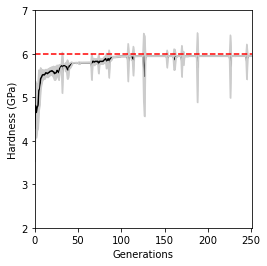

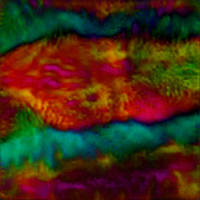

In [39]:
#Results
Optimized_Location= np.argmax(Fitness)
Optimized_Fitness = Fitness[Optimized_Location]
Optimized_Structure=Image.open(str(Sample_Image_Folder)+'/'+str(Optimized_Location)+'.png')
print('Best Structure: Number '+str(Optimized_Location)+' with Fitness '+str(Optimized_Fitness))

fig = mpplt.figure()
ax = fig.add_subplot(111)
ax.set_box_aspect(1)
mpplt.plot(avghardness, 'k')
mpplt.plot(np.array(avghardness)-np.array(devhardness), color='0.8')
mpplt.plot(np.array(avghardness)+np.array(devhardness), color='0.8')
mpplt.fill_between(range(0,gen+1),np.array(avghardness)-np.array(devhardness), np.array(avghardness)+np.array(devhardness), color='0.8')
mpplt.plot([0,gen], [Target_Hardness,Target_Hardness], 'r--')
mpplt.axis([0, gen, 2, 7])
mpplt.xlabel("Generations")
mpplt.ylabel("Hardness (GPa)")
mpplt.show()
Optimized_Structure